In [22]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels
import numpy as np
import scipy as sc
import math
from collections import Counter
import sklearn

import numpy as np

from scipy.special import gamma,psi
from scipy import ndimage
from scipy.linalg import det
from numpy import pi

from sklearn.neighbors import NearestNeighbors

In [23]:
data = pd.read_csv('Test.csv').astype(float)

n = data.values

t = np.ravel(n)

print (t)

[ 1.  1.  1.  2.]


In [24]:
def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent

print (entropy(t))

0.811278124459


In [25]:
def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1/p) for p in propab])
        return ent

print (entropy(t))

0.811278124459


In [31]:
colorIm=Image.open('Test.JPG')

colorIm=Image.open('Begin.JPG')

greyIm=colorIm.convert('L')
colorIm=np.array(colorIm)
greyIm=np.array(greyIm)

colorIm=Image.open('Begin.JPG')
greyIm=colorIm.convert('L')
colorIm=np.array(colorIm)
greyIm=np.array(greyIm)

In [30]:
N=5
S=.shape
E=np.array(greyIm)
for row in range(S[0]):
        for col in range(S[1]):
                Lx=np.max([0,col-N])
                Ux=np.min([S[1],col+N])
                Ly=np.max([0,row-N])
                Uy=np.min([S[0],row+N])
                region=greyIm[Ly:Uy,Lx:Ux].flatten()
                E[row,col]=entropy(region)

AttributeError: Dataset does not have attribute 'shape'.

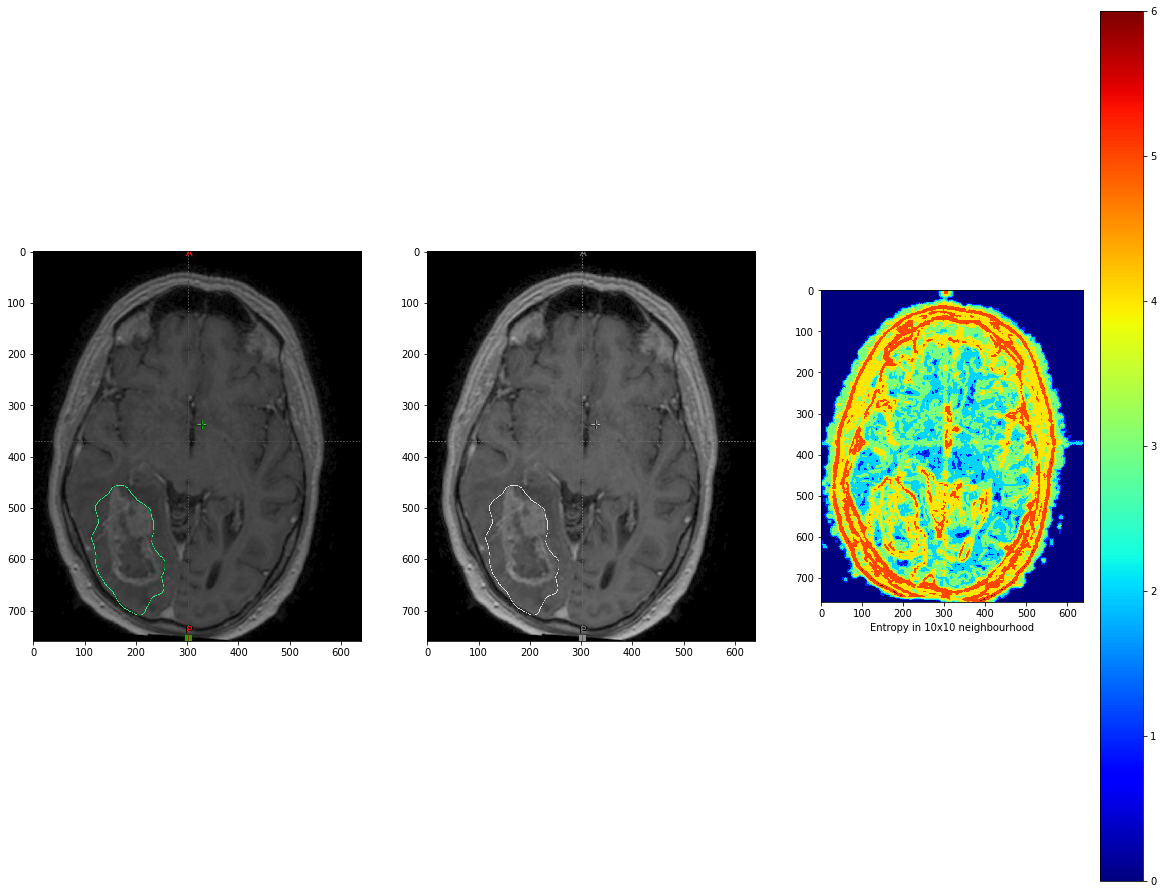

In [28]:

plt.figure(figsize=(20, 16))
plt.subplot(1,3,1)
plt.imshow(colorIm)

plt.subplot(1,3,2)
plt.imshow(greyIm, cmap=plt.cm.gray)


plt.subplot(1,3,3)
plt.imshow(E, cmap=plt.cm.jet)
plt.xlabel('Entropy in 10x10 neighbourhood')
plt.colorbar()

plt.show()



In [21]:

import xml.etree.ElementTree as ET
tree = ET.parse('PTV.xml')
root = tree.getroot()
print (root.tag)

plist


In [22]:

import xml.etree.ElementTree as ET

import pandas as pd

xml_data = open('PTV.xml').read()

def xml2df(xml_data):
    root = ET.XML(xml_data) # element tree
    all_records = []
    for i, child in enumerate(root):
        record = {}
        for subchild in child:
            record[subchild.tag] = subchild.text
            all_records.append(record)
    return pd.DataFrame(all_records)

In [30]:
print (xml_data)

<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE plist PUBLIC "-//Apple//DTD PLIST 1.0//EN" "http://www.apple.com/DTDs/PropertyList-1.0.dtd">
<plist version="1.0">
<dict>
	<key>DataSummary</key>
	<dict>
		<key>AreaCM2</key>
		<real>57.104565429687504</real>
		<key>AreaPIX2</key>
		<real>5987.84765625</real>
		<key>Dev</key>
		<real>363.01754760742188</real>
		<key>LengthCM</key>
		<real>42.686511993408203</real>
		<key>LengthPIX</key>
		<real>437.13214111328125</real>
		<key>Max</key>
		<real>491</real>
		<key>Mean</key>
		<real>-195.03526306152344</real>
		<key>Min</key>
		<real>-975</real>
		<key>Name</key>
		<string>PTV</string>
		<key>Total</key>
		<real>-1194591</real>
		<key>Type</key>
		<string>Geschlossenes Polygon</string>
	</dict>
	<key>DataValues</key>
	<array>
		<real>189</real>
		<real>77</real>
		<real>66</real>
		<real>88</real>
		<real>101</real>
		<real>98</real>
		<real>82</real>
		<real>64</real>
		<real>64</real>
		<real>214</real>
		<real>347</real>
		<real>174</re

In [24]:
def to_dataframe(raw_xml):
    root = ET.XML(raw_xml) # element tree
    all_records = []
    
    for i, child in enumerate(root):
        record = {}
        for subchild in child:
            record[subchild.tag] = subchild.text
            all_records.append(record)
    return pd.DataFrame(all_records)

In [35]:
df = pd.read_json('jsson.json')
df.head()

,00020000,00020001,00020002,00020003,00020010,00020012,00080005,00080008,00080012,00080013,...,30060010,30060020,30060039,30060080,300E0002,32530010,32531000,32531001,32531002,7FE00010
0,"{'vr': 'UL', 'Value': ['172']}","{'InlineBinary': 'AAE=', 'vr': 'OB'}","{'vr': 'UI', 'Value': ['1.2.840.10008.5.1.4.1....","{'vr': 'UI', 'Value': ['1.3.6.1.4.1.2452.6.183...","{'vr': 'UI', 'Value': ['1.2.840.10008.1.2']}","{'vr': 'UI', 'Value': ['1.2.246.352.70.2.1.7']}","{'vr': 'CS', 'Value': ['ISO_IR 100']}","{'vr': 'CS', 'Value': ['ORIGINAL', 'PRIMARY', ...","{'vr': 'DA', 'Value': ['20170705']}","{'vr': 'TM', 'Value': ['155310.902000']}",...,NaN,NaN,NaN,NaN,NaN,"{'vr': 'LO', 'Value': ['Varian Medical Systems...",{'InlineBinary': 'PFJUSW1hZ2VFeHRlbmRlZEludGVy...,"{'InlineBinary': 'MCA=', 'vr': 'UN'}","{'InlineBinary': 'SW1hZ2VQcm9jZXNzaW5nIA==', '...",{'InlineBinary': 'GAAYABgAGAAYABgAGAAYABgAGAAY...
1,"{'vr': 'UL', 'Value': ['172']}","{'InlineBinary': 'AAE=', 'vr': 'OB'}","{'vr': 'UI', 'Value': ['1.2.840.10008.5.1.4.1....","{'vr': 'UI', 'Value': ['1.3.6.1.4.1.2452.6.283...","{'vr': 'UI', 'Value': ['1.2.840.10008.1.2']}","{'vr': 'UI', 'Value': ['1.2.246.352.70.2.1.7']}","{'vr': 'CS', 'Value': ['ISO_IR 100']}","{'vr': 'CS', 'Value': ['ORIGINAL', 'PRIMARY', ...","{'vr': 'DA', 'Value': ['20170705']}","{'vr': 'TM', 'Value': ['155311.011000']}",...,NaN,NaN,NaN,NaN,NaN,"{'vr': 'LO', 'Value': ['Varian Medical Systems...",{'InlineBinary': 'PFJUSW1hZ2VFeHRlbmRlZEludGVy...,"{'InlineBinary': 'MCA=', 'vr': 'UN'}","{'InlineBinary': 'SW1hZ2VQcm9jZXNzaW5nIA==', '...",{'InlineBinary': 'GAAYABgAGAAYABgAGAAYABgAGAAY...
2,"{'vr': 'UL', 'Value': ['172']}","{'InlineBinary': 'AAE=', 'vr': 'OB'}","{'vr': 'UI', 'Value': ['1.2.840.10008.5.1.4.1....","{'vr': 'UI', 'Value': ['1.3.6.1.4.1.2452.6.404...","{'vr': 'UI', 'Value': ['1.2.840.10008.1.2']}","{'vr': 'UI', 'Value': ['1.2.246.352.70.2.1.7']}","{'vr': 'CS', 'Value': ['ISO_IR 100']}","{'vr': 'CS', 'Value': ['ORIGINAL', 'PRIMARY', ...","{'vr': 'DA', 'Value': ['20170705']}","{'vr': 'TM', 'Value': ['155311.136000']}",...,NaN,NaN,NaN,NaN,NaN,"{'vr': 'LO', 'Value': ['Varian Medical Systems...",{'InlineBinary': 'PFJUSW1hZ2VFeHRlbmRlZEludGVy...,"{'InlineBinary': 'MCA=', 'vr': 'UN'}","{'InlineBinary': 'SW1hZ2VQcm9jZXNzaW5nIA==', '...",{'InlineBinary': 'GAAYABgAGAAYABgAGAAYABgAGAAY...
3,"{'vr': 'UL', 'Value': ['172']}","{'InlineBinary': 'AAE=', 'vr': 'OB'}","{'vr': 'UI', 'Value': ['1.2.840.10008.5.1.4.1....","{'vr': 'UI', 'Value': ['1.3.6.1.4.1.2452.6.123...","{'vr': 'UI', 'Value': ['1.2.840.10008.1.2']}","{'vr': 'UI', 'Value': ['1.2.246.352.70.2.1.7']}","{'vr': 'CS', 'Value': ['ISO_IR 100']}","{'vr': 'CS', 'Value': ['ORIGINAL', 'PRIMARY', ...","{'vr': 'DA', 'Value': ['20170705']}","{'vr': 'TM', 'Value': ['155310.840000']}",...,NaN,NaN,NaN,NaN,NaN,"{'vr': 'LO', 'Value': ['Varian Medical Systems...",{'InlineBinary': 'PFJUSW1hZ2VFeHRlbmRlZEludGVy...,"{'InlineBinary': 'MCA=', 'vr': 'UN'}","{'InlineBinary': 'SW1hZ2VQcm9jZXNzaW5nIA==', '...",{'InlineBinary': 'GAAYABgAGAAYABgAGAAYABgAGAAY...
4,"{'vr': 'UL', 'Value': ['172']}","{'InlineBinary': 'AAE=', 'vr': 'OB'}","{'vr': 'UI', 'Value': ['1.2.840.10008.5.1.4.1....","{'vr': 'UI', 'Value': ['1.3.6.1.4.1.2452.6.356...","{'vr': 'UI', 'Value': ['1.2.840.10008.1.2']}","{'vr': 'UI', 'Value': ['1.2.246.352.70.2.1.7']}","{'vr': 'CS', 'Value': ['ISO_IR 100']}","{'vr': 'CS', 'Value': ['ORIGINAL', 'PRIMARY', ...","{'vr': 'DA', 'Value': ['20170705']}","{'vr': 'TM', 'Value': ['155311.074000']}",...,NaN,NaN,NaN,NaN,NaN,"{'vr': 'LO', 'Value': ['Varian Medical Systems...",{'InlineBinary': 'PFJUSW1hZ2VFeHRlbmRlZEludGVy...,"{'InlineBinary': 'MCA=', 'vr': 'UN'}","{'InlineBinary': 'SW1hZ2VQcm9jZXNzaW5nIA==', '...",{'InlineBinary': 'GAAYABgAGAAYABgAGAAYABgAGAAY...


In [5]:
import json
import pandas as pd
df=pd.read_json('jsson.json', orient='columns')
#df.drop(df.head(1).index, inplace=True)
df


,00020000,00020001,00020002,00020003,00020010,00020012,00080005,00080008,00080012,00080013,...,30060010,30060020,30060039,30060080,300E0002,32530010,32531000,32531001,32531002,7FE00010
0,"{'Value': ['172'], 'vr': 'UL'}","{'vr': 'OB', 'InlineBinary': 'AAE='}","{'Value': ['1.2.840.10008.5.1.4.1.1.2'], 'vr':...",{'Value': ['1.3.6.1.4.1.2452.6.183887235.13269...,"{'Value': ['1.2.840.10008.1.2'], 'vr': 'UI'}","{'Value': ['1.2.246.352.70.2.1.7'], 'vr': 'UI'}","{'Value': ['ISO_IR 100'], 'vr': 'CS'}","{'Value': ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT...","{'Value': ['20170705'], 'vr': 'DA'}","{'Value': ['155310.902000'], 'vr': 'TM'}",...,NaN,NaN,NaN,NaN,NaN,{'Value': ['Varian Medical Systems VISION 3253...,"{'vr': 'UN', 'InlineBinary': 'PFJUSW1hZ2VFeHRl...","{'vr': 'UN', 'InlineBinary': 'MCA='}","{'vr': 'UN', 'InlineBinary': 'SW1hZ2VQcm9jZXNz...","{'vr': 'OW', 'InlineBinary': 'GAAYABgAGAAYABgA..."
1,"{'Value': ['172'], 'vr': 'UL'}","{'vr': 'OB', 'InlineBinary': 'AAE='}","{'Value': ['1.2.840.10008.5.1.4.1.1.2'], 'vr':...",{'Value': ['1.3.6.1.4.1.2452.6.2837131662.1337...,"{'Value': ['1.2.840.10008.1.2'], 'vr': 'UI'}","{'Value': ['1.2.246.352.70.2.1.7'], 'vr': 'UI'}","{'Value': ['ISO_IR 100'], 'vr': 'CS'}","{'Value': ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT...","{'Value': ['20170705'], 'vr': 'DA'}","{'Value': ['155311.011000'], 'vr': 'TM'}",...,NaN,NaN,NaN,NaN,NaN,{'Value': ['Varian Medical Systems VISION 3253...,"{'vr': 'UN', 'InlineBinary': 'PFJUSW1hZ2VFeHRl...","{'vr': 'UN', 'InlineBinary': 'MCA='}","{'vr': 'UN', 'InlineBinary': 'SW1hZ2VQcm9jZXNz...","{'vr': 'OW', 'InlineBinary': 'GAAYABgAGAAYABgA..."
2,"{'Value': ['172'], 'vr': 'UL'}","{'vr': 'OB', 'InlineBinary': 'AAE='}","{'Value': ['1.2.840.10008.5.1.4.1.1.2'], 'vr':...",{'Value': ['1.3.6.1.4.1.2452.6.4043942681.1316...,"{'Value': ['1.2.840.10008.1.2'], 'vr': 'UI'}","{'Value': ['1.2.246.352.70.2.1.7'], 'vr': 'UI'}","{'Value': ['ISO_IR 100'], 'vr': 'CS'}","{'Value': ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT...","{'Value': ['20170705'], 'vr': 'DA'}","{'Value': ['155311.136000'], 'vr': 'TM'}",...,NaN,NaN,NaN,NaN,NaN,{'Value': ['Varian Medical Systems VISION 3253...,"{'vr': 'UN', 'InlineBinary': 'PFJUSW1hZ2VFeHRl...","{'vr': 'UN', 'InlineBinary': 'MCA='}","{'vr': 'UN', 'InlineBinary': 'SW1hZ2VQcm9jZXNz...","{'vr': 'OW', 'InlineBinary': 'GAAYABgAGAAYABgA..."
3,"{'Value': ['172'], 'vr': 'UL'}","{'vr': 'OB', 'InlineBinary': 'AAE='}","{'Value': ['1.2.840.10008.5.1.4.1.1.2'], 'vr':...",{'Value': ['1.3.6.1.4.1.2452.6.1230885821.1083...,"{'Value': ['1.2.840.10008.1.2'], 'vr': 'UI'}","{'Value': ['1.2.246.352.70.2.1.7'], 'vr': 'UI'}","{'Value': ['ISO_IR 100'], 'vr': 'CS'}","{'Value': ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT...","{'Value': ['20170705'], 'vr': 'DA'}","{'Value': ['155310.840000'], 'vr': 'TM'}",...,NaN,NaN,NaN,NaN,NaN,{'Value': ['Varian Medical Systems VISION 3253...,"{'vr': 'UN', 'InlineBinary': 'PFJUSW1hZ2VFeHRl...","{'vr': 'UN', 'InlineBinary': 'MCA='}","{'vr': 'UN', 'InlineBinary': 'SW1hZ2VQcm9jZXNz...","{'vr': 'OW', 'InlineBinary': 'GAAYABgAGAAYABgA..."
4,"{'Value': ['172'], 'vr': 'UL'}","{'vr': 'OB', 'InlineBinary': 'AAE='}","{'Value': ['1.2.840.10008.5.1.4.1.1.2'], 'vr':...",{'Value': ['1.3.6.1.4.1.2452.6.3560325222.1188...,"{'Value': ['1.2.840.10008.1.2'], 'vr': 'UI'}","{'Value': ['1.2.246.352.70.2.1.7'], 'vr': 'UI'}","{'Value': ['ISO_IR 100'], 'vr': 'CS'}","{'Value': ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT...","{'Value': ['20170705'], 'vr': 'DA'}","{'Value': ['155311.074000'], 'vr': 'TM'}",...,NaN,NaN,NaN,NaN,NaN,{'Value': ['Varian Medical Systems VISION 3253...,"{'vr': 'UN', 'InlineBinary': 'PFJUSW1hZ2VFeHRl...","{'vr': 'UN', 'InlineBinary': 'MCA='}","{'vr': 'UN', 'InlineBinary': 'SW1hZ2VQcm9jZXNz...","{'vr': 'OW', 'InlineBinary': 'GAAYABgAGAAYABgA..."
5,"{'Value': ['172'], 'vr': 'UL'}","{'vr': 'OB', 'InlineBinary': 'AAE='}","{'Value': ['1.2.840.10008.5.1.4.1.1.2'], 'vr':...",{'Value': ['1.3.6.1.4.1.2452.6.2468473803.1310...,"{'Value': ['1.2.840.10008.1.2'], 'vr': 'UI'}","{'Value': ['1.2.

In [6]:
import dicom
import os
import numpy
from matplotlib import pyplot, cm

In [9]:
PathDicom = "cplx_p01.dcm"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [13]:
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
    
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 80]))

IndexError: list index out of range

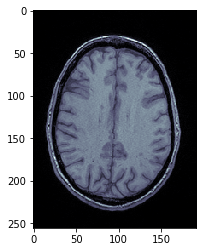

In [18]:
import dicom
import pylab
ds = dicom.read_file("img_118.dcm") # (rtplan.dcm is in the testfiles directory)
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()
